In [1]:
# Read following package
import pandas as pd
from pandas import DataFrame
from IPython.display import HTML


# Funcitons
from PreEval import PolicyDayBefore, ConfirmedCases
from MobilityPredict import model_predict
from CasesPredict import cases_predict

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data (policy+mobility combined)
data = pd.read_csv('/Users/Jenny/Desktop/COVID19/cleaned/policy_mobiliy.csv')

In [3]:
# Only have following policies available
policy = ['STEMERG', 'CLSCHOOL', 'CLDAYCR',
       'FM_ALL', 'FM_EMP', 'CLNURSHM', 'EVICINTN', 'EVICENF',
       'STAYHOME', 'END_STHM', 'CLBSNS', 'END_BSNS', 'CLREST', 'ENDREST',
       'CLGYM', 'ENDGYM', 'CLMOVIE', 'END_MOV']

# Pre-evaluation

### What policies are still active?

In [4]:
myList = PolicyDayBefore(data, state = 'IL', policy_lst = policy)
HTML(DataFrame(myList).to_html())

,policy,description,status
0,STEMERG,State of emergency,active
1,CLSCHOOL,Date closed K-12 schools,active
2,CLDAYCR,Closed day cares,active
3,FM_ALL,Mandate face mask use by all individuals in public spaces,active
4,FM_EMP,Mandate face mask use by employees in public-facing businesses,active
5,CLNURSHM,Date banned visitors to nursing homes,inactive
6,EVICINTN,Stop Initiation of Evictions overall or due to COVID related issues,inactive
7,EVICENF,Stop enforcement of evictions overall or due to COVID related issues,active
8,STAYHOME,Stay at home/ shelter in place,inactive
9,END_STHM,End/relax stay at home/shelter in place,active


### How many confirmed cases we have so far? What is the trending of daily new cases?

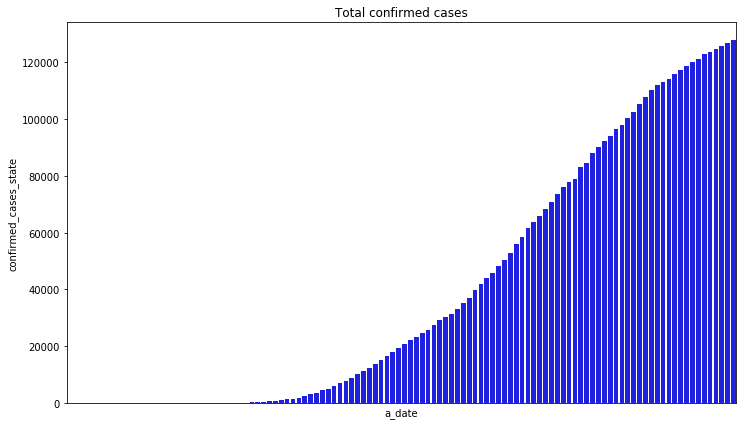

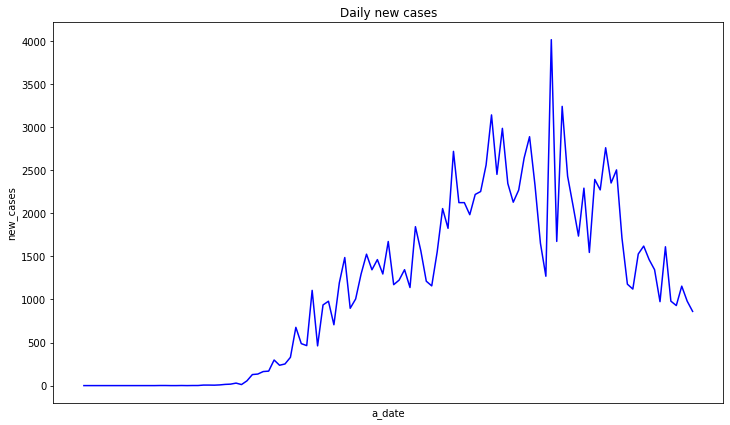

In [5]:
cases = ConfirmedCases(data, 'IL')
cases.show_total()
cases.show_daily_new()

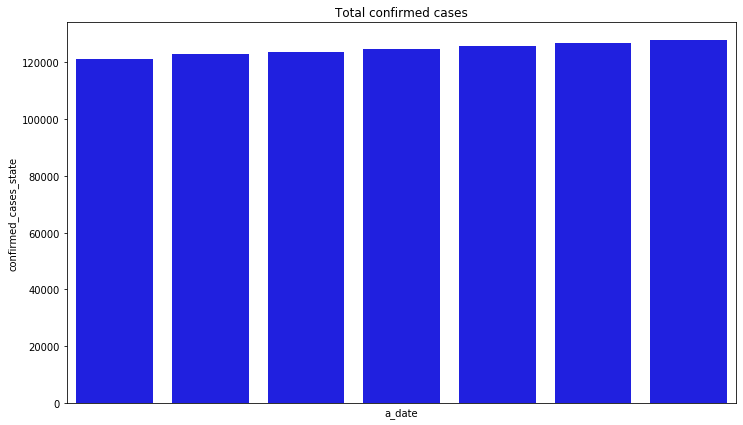

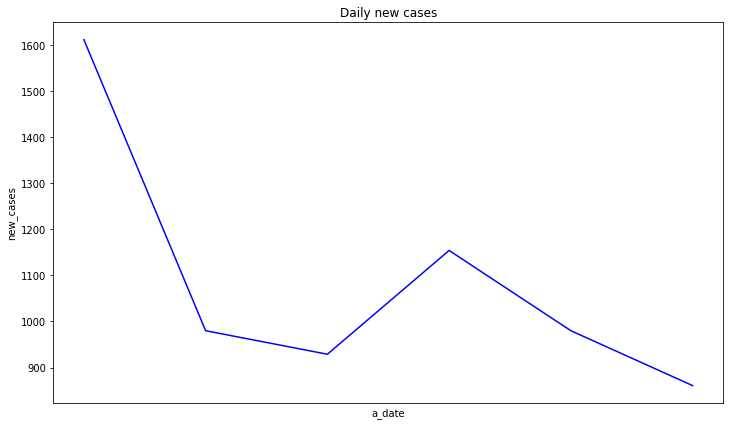

In [6]:
# You can also put start and end date of the time period you want to look at. Format has to be 'yyyy-mm-dd'
cases = ConfirmedCases(data, 'IL', start='2020-06-01')
cases.show_total()
cases.show_daily_new()

# New Policies

### What policies are we going to implement from tomorrow?

#### Put your policies in the corresponding bracket. For example: inactive=['policy1', 'policy2']

In [7]:
print('Stop following policies:')  # put the policy code in ['policy1', 'policy2'...]
inactive = ['CLDAYCR', 'CLMOVIE']
print(inactive)

print('\n')

print('Start following:')
active = ['END_MOV']
print(active)

Stop following policies:
['CLDAYCR', 'CLMOVIE']


Start following:
['END_MOV']


# Predict Mobility

### Based on the policies we choose to change, what is the predicted mobility of the next 7 days? How does it compare to the predicted mobility if we don't change policies?

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,date,predicted mobility with changed policy,predicted mobility with old policy remained
0,2020-06-08,-13.251702,-20.867982
1,2020-06-09,-12.832355,-21.435291
2,2020-06-10,-13.597083,-21.193712
3,2020-06-11,-13.431549,-21.265849
4,2020-06-12,-13.226994,-21.734983
5,2020-06-13,-14.053075,-21.729749
6,2020-06-14,-15.659100,-24.046347


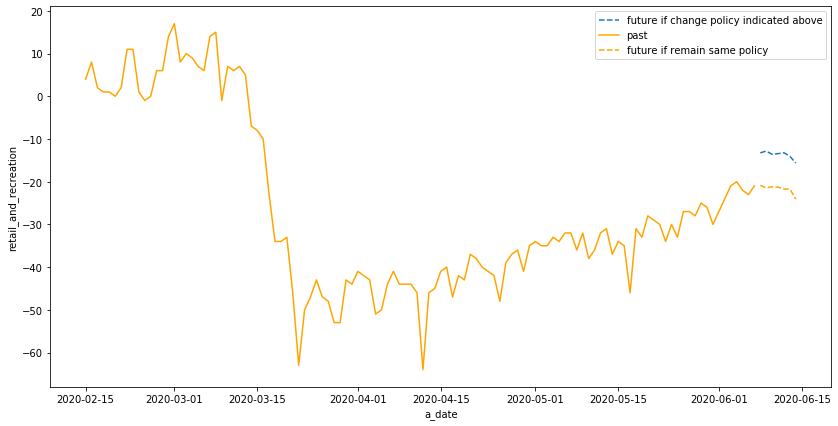

In [8]:
mobility_pred, mobility_pred_unchanged = model_predict(data, policy, 'IL', 'retail_and_recreation', active, inactive)

# Predicted Confirmed Cases
#### Please note: 
This block acts as a placeholder. User should replace this block with a better predictive model that uses mobility as some of the predictors and confirmed cases as target variable. The model being used here is a badly fit model using mobility as the only predictor. 

,date,predicted daily new cases with changed policy,predicted daily new cases with old policy remained
0,2020-06-08,461.0,936.0
1,2020-06-09,461.0,936.0
2,2020-06-10,461.0,936.0
3,2020-06-11,461.0,936.0
4,2020-06-12,461.0,936.0
5,2020-06-13,461.0,936.0
6,2020-06-14,461.0,936.0


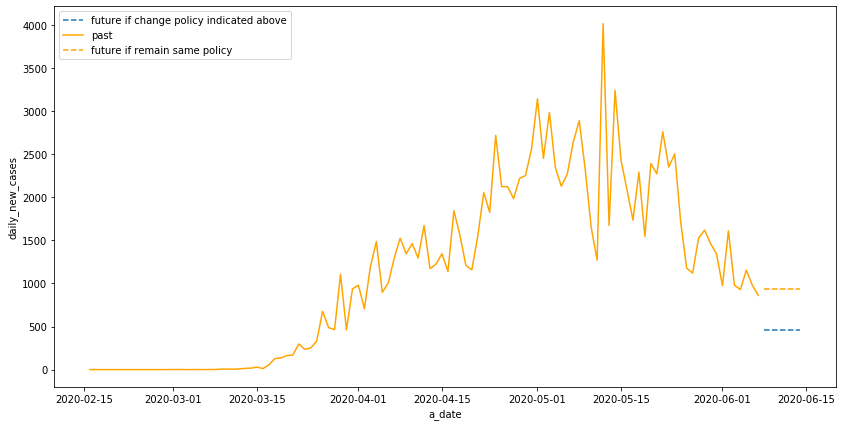

In [9]:
cases_predict(data, 'IL', mobility_pred, mobility_pred_unchanged)